In [17]:
# Import necessary libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# Connect to the SQLite database
conn = sqlite3.connect('deathdata.db')

# Query to get the total deaths for each cause for 'World'
world_causes_query = """
SELECT 
    "Deaths - Meningitis - Sex: Both - Age: All Ages (Number)" AS "Meningitis",
    "Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)" AS "Alzheimer's disease and other dementias",
    "Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)" AS "Parkinson's disease",
    "Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)" AS "Nutritional deficiencies",
    "Deaths - Malaria - Sex: Both - Age: All Ages (Number)" AS "Malaria",
    "Deaths - Drowning - Sex: Both - Age: All Ages (Number)" AS "Drowning",
    "Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)" AS "Interpersonal violence",
    "Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)" AS "Maternal disorders",
    "Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)" AS "HIV/AIDS",
    "Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)" AS "Drug use disorders",
    "Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)" AS "Tuberculosis",
    "Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)" AS "Cardiovascular diseases",
    "Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)" AS "Lower respiratory infections",
    "Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)" AS "Neonatal disorders",
    "Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)" AS "Alcohol use disorders",
    "Deaths - Self-harm - Sex: Both - Age: All Ages (Number)" AS "Self-harm",
    "Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number)" AS "Exposure to forces of nature",
    "Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number)" AS "Diarrheal diseases",
    "Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number)" AS "Environmental heat and cold exposure",
    "Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)" AS "Neoplasms",
    "Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number)" AS "Conflict and terrorism",
    "Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number)" AS "Diabetes mellitus",
    "Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number)" AS "Chronic kidney disease",
    "Deaths - Poisonings - Sex: Both - Age: All Ages (Number)" AS "Poisonings",
    "Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number)" AS "Protein-energy malnutrition",
    "Deaths - Road injuries - Sex: Both - Age: All Ages (Number)" AS "Road injuries",
    "Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)" AS "Chronic respiratory diseases",
    "Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number)" AS "Cirrhosis and other chronic liver diseases",
    "Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number)" AS "Digestive diseases",
    "Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)" AS "Fire, heat, and hot substances",
    "Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)" AS "Acute hepatitis",
    "Deaths - Measles - Sex: Both - Age: All Ages (Number)" AS "Measles"
FROM death_causes
WHERE Entity = 'World' AND Year > 2014
"""

world_causes_result = pd.read_sql(world_causes_query, conn)

# Close the database connection
conn.close()

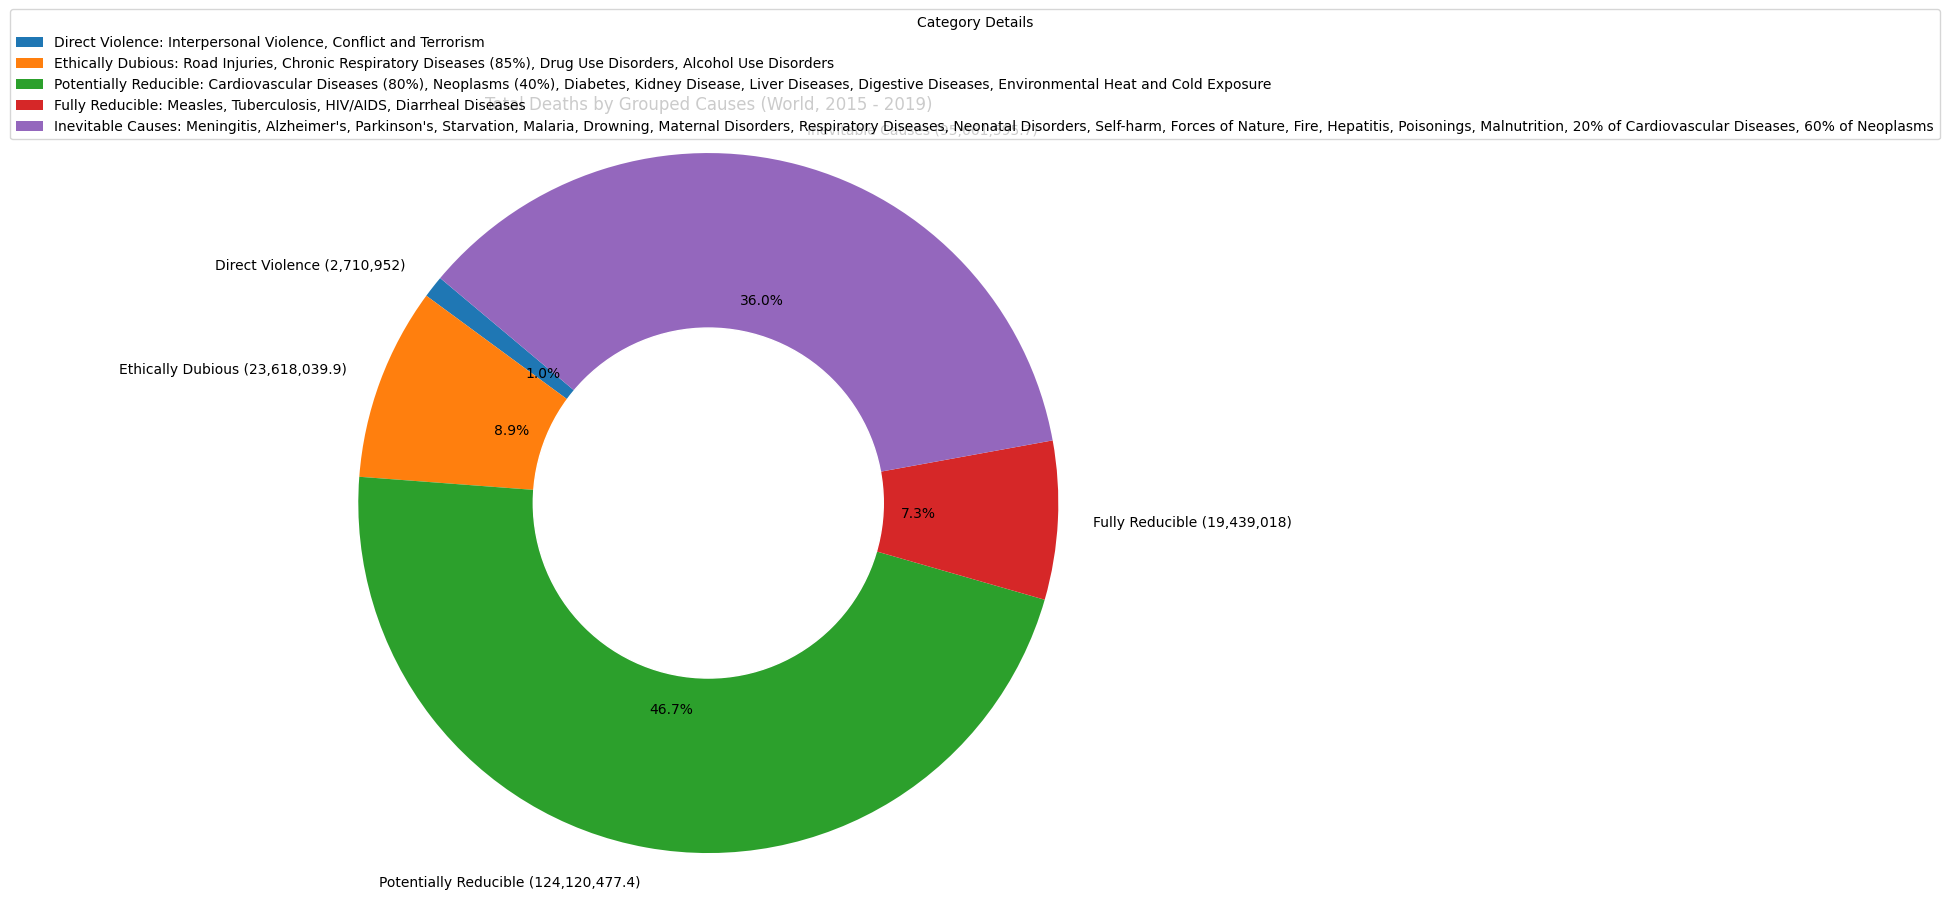

In [19]:
# Check if data is available and process it
if not world_causes_result.empty and not world_causes_result.isna().all().all():
    causes_totals = world_causes_result.sum().sort_values(ascending=False)

    # Define categories and calculate their totals
    category_totals = {
        'Direct Violence': causes_totals['Interpersonal violence'] + causes_totals['Conflict and terrorism'],
        'Ethically Dubious': (causes_totals['Road injuries'] + 0.85 * causes_totals['Chronic respiratory diseases'] +
                              causes_totals['Drug use disorders'] + causes_totals['Alcohol use disorders']),
        'Potentially Reducible': (0.8 * causes_totals['Cardiovascular diseases'] + 0.4 * causes_totals['Neoplasms'] +
                                  causes_totals[['Diabetes mellitus', 'Chronic kidney disease', 'Cirrhosis and other chronic liver diseases',
                                                 'Digestive diseases', 'Environmental heat and cold exposure']].sum()),
        'Fully Reducible': causes_totals[['Measles', 'Tuberculosis', 'HIV/AIDS', 'Diarrheal diseases']].sum(),
        'Inevitable Causes': (causes_totals[['Meningitis', "Alzheimer's disease and other dementias", "Parkinson's disease",
                                             'Nutritional deficiencies', 'Malaria', 'Drowning', 'Maternal disorders',
                                             'Lower respiratory infections', 'Neonatal disorders', 'Self-harm',
                                             'Exposure to forces of nature', 'Fire, heat, and hot substances',
                                             'Acute hepatitis', 'Poisonings', 'Protein-energy malnutrition']].sum() +
                              0.15 * causes_totals['Chronic respiratory diseases'] +
                              0.2 * causes_totals['Cardiovascular diseases'] +
                              0.6 * causes_totals['Neoplasms'])
    }

    # Labels for the doughnut chart (simple)
    labels = [f'{key} ({val:,})' for key, val in category_totals.items()]
    values = list(category_totals.values())

    # Plotting
    fig, ax = plt.subplots(figsize=(14, 10))
    wedges, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

    # Draw a circle at the center to create a doughnut chart
    center_circle = plt.Circle((0, 0), 0.50, color='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)

    # Adding a detailed legend
    legend_labels = [
        'Direct Violence: Interpersonal Violence, Conflict and Terrorism',
        'Ethically Dubious: Road Injuries, Chronic Respiratory Diseases (85%), Drug Use Disorders, Alcohol Use Disorders',
        'Potentially Reducible: Cardiovascular Diseases (80%), Neoplasms (40%), Diabetes, Kidney Disease, Liver Diseases, Digestive Diseases, Environmental Heat and Cold Exposure',
        'Fully Reducible: Measles, Tuberculosis, HIV/AIDS, Diarrheal Diseases',
        'Inevitable Causes: Meningitis, Alzheimer\'s, Parkinson\'s, Starvation, Malaria, Drowning, Maternal Disorders, Respiratory Diseases, Neonatal Disorders, Self-harm, Forces of Nature, Fire, Hepatitis, Poisonings, Malnutrition, 20% of Cardiovascular Diseases, 60% of Neoplasms'
    ]
    plt.legend(wedges, legend_labels, title="Category Details", loc='upper left', bbox_to_anchor=(-0.15, 1.15))

    # Set the title and display the chart
    plt.title('Total Deaths by Grouped Causes (World, 2015 - 2019)')
    plt.axis('equal')  # Equal aspect ratio ensures that pie/doughnut is drawn as a circle.
    plt.show()
else:
    print("No data available for 'World' or data is incomplete.")